In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df = pd.read_csv('top_2450.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'top_2450.csv'

In [5]:
df.head()

NameError: name 'df' is not defined

In [4]:
df.columns

Index(['User', 'new_date', 'new_time', 'Duration', 'AVG Viewers',
       'MAX Viewers', 'Followers Gain', 'Live Views', 'Title',
       'daytime_classifier'],
      dtype='object')

In [5]:
#df.describe

In [6]:
target = df[df['User']=='tommyinnit']

In [7]:
target

,User,new_date,new_time,Duration,AVG Viewers,MAX Viewers,Followers Gain,Live Views,Title,daytime_classifier
0,tommyinnit,2017-11-24,19:52:18,62,6,7,4,51,ARMS - Ranked and Party!,3.0
1,tommyinnit,2017-11-25,18:02:30,42,8,10,0,15,ARMS - Ranked and Party!,3.0
2,tommyinnit,2017-11-26,15:36:16,28,5,5,0,0,Splatoon 2 - Turf & Salmon Run,2.0
3,tommyinnit,2017-12-09,20:13:15,11,4,4,0,0,ARMS - Ranked & Chill,3.0
4,tommyinnit,2017-12-17,18:27:13,97,9,12,5,14,Minecraft - Hypixel Bedwars & Chill,3.0
...,...,...,...,...,...,...,...,...,...,...
658,tommyinnit,2021-05-14,20:01:28,83,202113,234046,6197,192329,TAKING THE TOMMYINNIT QUIZ,3.0
659,tommyinnit,2021-05-15,18:50:18,94,207476,241051,8334,200352,The New Plan. (Dream SMP),3.0
660,tommyinnit,2021-05-29,18:31:26,183,174866,196499,15369,858407,"BIG MAN DOES MCC (with little tubbo, niki and ...",3.0
661,tommyinnit,2021-05-30,20:47:10,67,148013,185526,4045,150299,Void Rising 1v1 VS Ranboo,3.0


In [8]:
target['AVG Viewers'].dtype

dtype('int64')

In [9]:
target['new_date'].dtype

dtype('O')

In [10]:
target['new_date'] = pd.to_datetime(target['new_date'])

<ipython-input-10-bb5bcc6de647>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['new_date'] = pd.to_datetime(target['new_date'])


In [11]:
target['new_date'].dtype

dtype('<M8[ns]')

In [12]:
target['new_date']

0     2017-11-24
1     2017-11-25
2     2017-11-26
3     2017-12-09
4     2017-12-17
         ...    
658   2021-05-14
659   2021-05-15
660   2021-05-29
661   2021-05-30
662   2021-05-31
Name: new_date, Length: 663, dtype: datetime64[ns]

In [13]:
target['month'] = target['new_date'].dt.to_period('M')

<ipython-input-13-ee9c99e8f2f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['month'] = target['new_date'].dt.to_period('M')


In [14]:
target

,User,new_date,new_time,Duration,AVG Viewers,MAX Viewers,Followers Gain,Live Views,Title,daytime_classifier,month
0,tommyinnit,2017-11-24,19:52:18,62,6,7,4,51,ARMS - Ranked and Party!,3.0,2017-11
1,tommyinnit,2017-11-25,18:02:30,42,8,10,0,15,ARMS - Ranked and Party!,3.0,2017-11
2,tommyinnit,2017-11-26,15:36:16,28,5,5,0,0,Splatoon 2 - Turf & Salmon Run,2.0,2017-11
3,tommyinnit,2017-12-09,20:13:15,11,4,4,0,0,ARMS - Ranked & Chill,3.0,2017-12
4,tommyinnit,2017-12-17,18:27:13,97,9,12,5,14,Minecraft - Hypixel Bedwars & Chill,3.0,2017-12
...,...,...,...,...,...,...,...,...,...,...,...
658,tommyinnit,2021-05-14,20:01:28,83,202113,234046,6197,192329,TAKING THE TOMMYINNIT QUIZ,3.0,2021-05
659,tommyinnit,2021-05-15,18:50:18,94,207476,241051,8334,200352,The New Plan. (Dream SMP),3.0,2021-05
660,tommyinnit,2021-05-29,18:31:26,183,174866,196499,15369,858407,"BIG MAN DOES MCC (with little tubbo, niki and ...",3.0,2021-05
661,tommyinnit,2021-05-30,20:47:10,67,148013,185526,4045,150299,Void Rising 1v1 VS Ranboo,3.0,2021-05


In [15]:
target_grouped = target.groupby('month', as_index = False)[['AVG Viewers']].sum()

In [16]:
target_grouped['month'].dtypes

period[M]

In [33]:
target_grouped

,month,AVG Viewers
0,2017-11,19
1,2017-12,214
2,2018-01,241
3,2018-02,136
4,2018-03,94
5,2018-04,217
6,2018-05,276
7,2018-06,340
8,2018-07,459
9,2018-08,736


TypeError: plot got an unexpected keyword argument 'x'

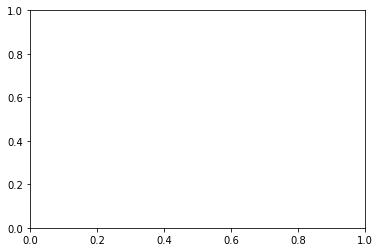

In [35]:
plt.plot(target_grouped, x='month', y='AVG Viewers')

In [43]:
target['Live Views'].dtype

dtype('int64')

<AxesSubplot:xlabel='month'>

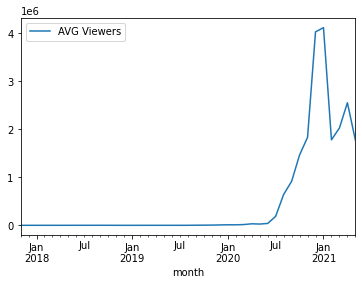

In [38]:
target_grouped.plot(x='month')

In [40]:
followers_grouped = target.groupby('month', as_index = False)[['Followers Gain']].sum()

In [41]:
followers_grouped

,month,Followers Gain
0,2017-11,4
1,2017-12,107
2,2018-01,55
3,2018-02,68
4,2018-03,54
5,2018-04,64
6,2018-05,126
7,2018-06,200
8,2018-07,328
9,2018-08,396


<AxesSubplot:xlabel='month'>

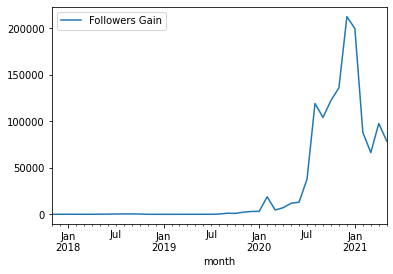

In [42]:
followers_grouped.plot(x='month')

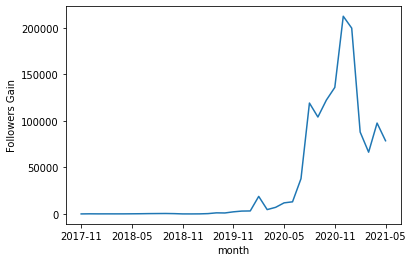

In [70]:
ax = sns.lineplot(data=followers_grouped, x='month', y='Followers Gain', hue="")
ax.set_xticks(ax.get_xticks()[::6]);

In [75]:
ax = px.line(followers_grouped, x='month', y='Followers Gain')

In [187]:
ax

In [47]:
followers_grouped.head()

,month,Followers Gain
0,2017-11,4
1,2017-12,107
2,2018-01,55
3,2018-02,68
4,2018-03,54


In [64]:
followers_grouped['month'] = followers_grouped['month'].astype(str)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

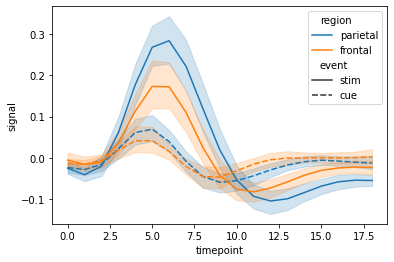

In [60]:
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [61]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [76]:
target

,User,new_date,new_time,Duration,AVG Viewers,MAX Viewers,Followers Gain,Live Views,Title,daytime_classifier,month
0,tommyinnit,2017-11-24,19:52:18,62,6,7,4,51,ARMS - Ranked and Party!,3.0,2017-11
1,tommyinnit,2017-11-25,18:02:30,42,8,10,0,15,ARMS - Ranked and Party!,3.0,2017-11
2,tommyinnit,2017-11-26,15:36:16,28,5,5,0,0,Splatoon 2 - Turf & Salmon Run,2.0,2017-11
3,tommyinnit,2017-12-09,20:13:15,11,4,4,0,0,ARMS - Ranked & Chill,3.0,2017-12
4,tommyinnit,2017-12-17,18:27:13,97,9,12,5,14,Minecraft - Hypixel Bedwars & Chill,3.0,2017-12
...,...,...,...,...,...,...,...,...,...,...,...
658,tommyinnit,2021-05-14,20:01:28,83,202113,234046,6197,192329,TAKING THE TOMMYINNIT QUIZ,3.0,2021-05
659,tommyinnit,2021-05-15,18:50:18,94,207476,241051,8334,200352,The New Plan. (Dream SMP),3.0,2021-05
660,tommyinnit,2021-05-29,18:31:26,183,174866,196499,15369,858407,"BIG MAN DOES MCC (with little tubbo, niki and ...",3.0,2021-05
661,tommyinnit,2021-05-30,20:47:10,67,148013,185526,4045,150299,Void Rising 1v1 VS Ranboo,3.0,2021-05


In [84]:
target['month'] = target['month'].astype(str)

<ipython-input-84-f589df96263b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
px.line(target, x='month', y='AVG Viewers')

In [78]:
avg_grouped = target.groupby('month', as_index = False)[['AVG Viewers']].mean()

In [81]:
avg_grouped

,month,AVG Viewers
0,2017-11,6.333333
1,2017-12,8.230769
2,2018-01,8.607143
3,2018-02,9.714286
4,2018-03,11.750000
5,2018-04,11.421053
6,2018-05,15.333333
7,2018-06,17.000000
8,2018-07,19.125000
9,2018-08,26.285714


In [82]:
avg_grouped['month'] = avg_grouped['month'].astype(str)

In [127]:
column = ['AVG Viewers', 'Duration']

In [129]:
px.line(avg_grouped, x='month', y=column)

ValueError: All arguments should have the same length. The length of argument `y` is 2, whereas the length of  previously-processed arguments ['month'] is 37

In [86]:
target.head()

,User,new_date,new_time,Duration,AVG Viewers,MAX Viewers,Followers Gain,Live Views,Title,daytime_classifier,month
0,tommyinnit,2017-11-24,19:52:18,62,6,7,4,51,ARMS - Ranked and Party!,3.0,2017-11
1,tommyinnit,2017-11-25,18:02:30,42,8,10,0,15,ARMS - Ranked and Party!,3.0,2017-11
2,tommyinnit,2017-11-26,15:36:16,28,5,5,0,0,Splatoon 2 - Turf & Salmon Run,2.0,2017-11
3,tommyinnit,2017-12-09,20:13:15,11,4,4,0,0,ARMS - Ranked & Chill,3.0,2017-12
4,tommyinnit,2017-12-17,18:27:13,97,9,12,5,14,Minecraft - Hypixel Bedwars & Chill,3.0,2017-12


In [91]:
duration_grouped = target.groupby('month', as_index = False)[['Duration']].sum()

In [92]:
duration_grouped

,month,Duration
0,2017-11,132
1,2017-12,3590
2,2018-01,2381
3,2018-02,1267
4,2018-03,878
5,2018-04,1569
6,2018-05,1454
7,2018-06,1762
8,2018-07,2144
9,2018-08,2596


In [93]:
duration_grouped['month'] =  duration_grouped['month'].astype(str)

In [114]:
px.line(duration_grouped, x='month', y='Duration', hue='month')

TypeError: line() got an unexpected keyword argument 'hue'

In [110]:
def lineplot(df, column):
    df_grouped = df.groupby('month', as_index = False)[[column]].sum()
    df_grouped['month'] =  df_grouped['month'].astype(str)
    ax = px.line(df_grouped, x='month', y=column)
    return ax

In [189]:
lineplot(target, 'Duration')

In [118]:
lineplot(target, 'Live Views')

In [154]:
top_5 = df.groupby('User', as_index=False).sum()

In [155]:
top_5 = top_5.sort_values(by=['AVG Viewers'], ascending=False)

In [156]:
top5=top_5.head()

In [157]:
top5

,User,Duration,AVG Viewers,MAX Viewers,Followers Gain,Live Views,daytime_classifier
961,Ninja,586235,48588413,68366874,11658879,462663454,2467.0
2247,xQcOW,861562,35720199,47432267,6286594,331265172,3734.0
1613,auronplay,88583,35257683,43950118,4066519,106231723,947.0
1415,TimTheTatman,523644,34059071,47064835,4959740,194271864,2562.0
2174,summit1g,881367,33104568,45114201,3864037,330034821,4016.0


In [158]:
y=top5['User']

In [173]:
to_drop = df[df['new_date'] == '1970-01-01'].index

In [174]:
df = df.drop(to_drop)

In [177]:
df['new_date'].max()

'2021-06-05'

In [178]:
date = pd.date_range(start = '01/11/2016', end='05/06/2021')

In [183]:
px.line(x=date, y=y)

ValueError: All arguments should have the same length. The length of argument `y` is 5, whereas the length of  previously-processed arguments ['x'] is 1943

In [123]:
x='month'
y=top5['User']
fig=go.Figure()
fig.add_trace(go.scatter(x=x, y='Live Views', name="linear",
                    line_shape='linear'))

TypeError: 'module' object is not callable

In [190]:
top5.groups

AttributeError: 'DataFrame' object has no attribute 'groups'

In [191]:
#10 most recent games of each user

In [194]:
df.sample(20)

,User,new_date,new_time,Duration,AVG Viewers,MAX Viewers,Followers Gain,Live Views,Title,daytime_classifier
942204,wayneradiotv,2018-05-03,02:01:04,193,38,51,1,96,wayneradiotv - LIVE! - Earth Defense Force | E...,0.0
75543,Mongraal,2018-12-23,11:18:19,586,8043,17212,11251,157445,Chillin w/ chat - Code Secret_Mongraal In Shop,1.0
1036189,NVIDIAGeForceTR,2017-04-12,17:28:44,196,2977,4145,1382,26829,jahrein'le cancur gaming,2.0
199390,alexelcapo,2019-06-11,15:35:26,79,29604,39390,241,39253,Nintendo | E3 2019,2.0
823390,Peereira7,2019-08-20,21:46:18,78,139,149,29,327,HOSTING SOLO CUSTOMS | !code !ig !youtube,3.0
808891,Rizzo,2020-09-30,15:44:42,350,2266,2932,779,16760,G2 Rizzo - beast beast beast !creatorcode,2.0
905442,KAPO_013_BARCELONA,2020-11-12,17:37:04,107,1074,1755,229,5996,SOY TT EN TWITTER ESPAÑA. POR LLORAR,2.0
149332,unsympathisch_tv,2020-04-06,18:32:40,392,3352,7977,3429,32429,12/10,3.0
1058616,Pikabooirl,2019-04-21,21:52:20,252,2072,2664,170,13945,Pikaboo - Happy Easter!,3.0
807154,Poseidon,2019-03-18,17:10:46,164,128,172,30,466,[ESP] GTA V ROLPLAY [DESPISTAOS] [LSPD] [OFICI...,2.0


In [217]:
tommy = df[df['User']=='tommyinnit']

In [218]:
tommy

,User,new_date,new_time,Duration,AVG Viewers,MAX Viewers,Followers Gain,Live Views,Title,daytime_classifier
0,tommyinnit,2017-11-24,19:52:18,62,6,7,4,51,ARMS - Ranked and Party!,3.0
1,tommyinnit,2017-11-25,18:02:30,42,8,10,0,15,ARMS - Ranked and Party!,3.0
2,tommyinnit,2017-11-26,15:36:16,28,5,5,0,0,Splatoon 2 - Turf & Salmon Run,2.0
3,tommyinnit,2017-12-09,20:13:15,11,4,4,0,0,ARMS - Ranked & Chill,3.0
4,tommyinnit,2017-12-17,18:27:13,97,9,12,5,14,Minecraft - Hypixel Bedwars & Chill,3.0
...,...,...,...,...,...,...,...,...,...,...
658,tommyinnit,2021-05-14,20:01:28,83,202113,234046,6197,192329,TAKING THE TOMMYINNIT QUIZ,3.0
659,tommyinnit,2021-05-15,18:50:18,94,207476,241051,8334,200352,The New Plan. (Dream SMP),3.0
660,tommyinnit,2021-05-29,18:31:26,183,174866,196499,15369,858407,"BIG MAN DOES MCC (with little tubbo, niki and ...",3.0
661,tommyinnit,2021-05-30,20:47:10,67,148013,185526,4045,150299,Void Rising 1v1 VS Ranboo,3.0


In [219]:
df['last_seen'] = df['new_date'] +' 'df['new_time']

SyntaxError: invalid syntax (<ipython-input-219-a1972736b757>, line 1)

In [220]:
tommy

,User,new_date,new_time,Duration,AVG Viewers,MAX Viewers,Followers Gain,Live Views,Title,daytime_classifier
0,tommyinnit,2017-11-24,19:52:18,62,6,7,4,51,ARMS - Ranked and Party!,3.0
1,tommyinnit,2017-11-25,18:02:30,42,8,10,0,15,ARMS - Ranked and Party!,3.0
2,tommyinnit,2017-11-26,15:36:16,28,5,5,0,0,Splatoon 2 - Turf & Salmon Run,2.0
3,tommyinnit,2017-12-09,20:13:15,11,4,4,0,0,ARMS - Ranked & Chill,3.0
4,tommyinnit,2017-12-17,18:27:13,97,9,12,5,14,Minecraft - Hypixel Bedwars & Chill,3.0
...,...,...,...,...,...,...,...,...,...,...
658,tommyinnit,2021-05-14,20:01:28,83,202113,234046,6197,192329,TAKING THE TOMMYINNIT QUIZ,3.0
659,tommyinnit,2021-05-15,18:50:18,94,207476,241051,8334,200352,The New Plan. (Dream SMP),3.0
660,tommyinnit,2021-05-29,18:31:26,183,174866,196499,15369,858407,"BIG MAN DOES MCC (with little tubbo, niki and ...",3.0
661,tommyinnit,2021-05-30,20:47:10,67,148013,185526,4045,150299,Void Rising 1v1 VS Ranboo,3.0


In [207]:
streamer.last_seen = pd.to_datetime(streamer.last_seen)

/home/dek/.pyenv/versions/3.8.6/envs/starfish/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [208]:
streamer.last_seen.dtype

dtype('<M8[ns]')

In [211]:
streamer = streamer.sort_values(by=['last_seen'], ascending=False)

In [214]:
ten_recent_streams = streamer.head(10)

In [215]:
ten_recent_streams

,User,new_date,new_time,Duration,AVG Viewers,MAX Viewers,Followers Gain,Live Views,Title,daytime_classifier,last_seen
662,tommyinnit,2021-05-31,19:13:56,81,189432,218220,6036,185754,Quackity's New Nation. (lore),3.0,2021-05-31 19:13:56
661,tommyinnit,2021-05-30,20:47:10,67,148013,185526,4045,150299,Void Rising 1v1 VS Ranboo,3.0,2021-05-30 20:47:10
660,tommyinnit,2021-05-29,18:31:26,183,174866,196499,15369,858407,"BIG MAN DOES MCC (with little tubbo, niki and ...",3.0,2021-05-29 18:31:26
659,tommyinnit,2021-05-15,18:50:18,94,207476,241051,8334,200352,The New Plan. (Dream SMP),3.0,2021-05-15 18:50:18
658,tommyinnit,2021-05-14,20:01:28,83,202113,234046,6197,192329,TAKING THE TOMMYINNIT QUIZ,3.0,2021-05-14 20:01:28
657,tommyinnit,2021-05-10,20:52:50,72,212142,279625,5267,143782,I've Got To Steal From Technoblade,3.0,2021-05-10 20:52:50
656,tommyinnit,2021-05-07,20:14:09,90,205512,255928,11381,258837,IM HERE!!!!! (Dream SMP),3.0,2021-05-07 20:14:09
655,tommyinnit,2021-05-05,20:50:50,104,203708,279611,11065,325619,Wilbur Is Revived.,3.0,2021-05-05 20:50:50
654,tommyinnit,2021-05-04,19:58:23,86,231132,294094,11021,169777,Very special stream,3.0,2021-05-04 19:58:23
653,tommyinnit,2021-04-29,20:10:21,64,527676,609567,11702,235908,Breaking Into Prison To Kill Dream.,3.0,2021-04-29 20:10:21


In [1]:
def get_10_recent_streams(df, streamer):
    '''gets the 10 most recent streams of each user
       input: name of the streamer in '' 
       csv:top_2450.csv
    '''
    streamer_df = df[df['User']== streamer]
    streamer_df['last_seen'] = streamer_df['new_date'] +' '+streamer_df['new_time']
    streamer_df['last_seen'] = pd.to_datetime(streamer_df['last_seen'])
    streamer_df = streamer_df.sort_values(by=['last_seen'], ascending=False)
    ten_recent_streams = streamer_df.head(10)
    ten_recent_streams = ten_recent_streams.sort_values(by=['Duration'])
    px.pie(ten_recent_streams, values='Duration', names='Title')
    return ten_recent_streams

In [2]:
get_10_recent_streams(df, 'tommyinnit')

NameError: name 'df' is not defined